In [ ]:
import pandas as pd
data = pd.read_csv("https://trello-attachments.s3.amazonaws.com/5ec51b0a60825888a0262243/5eddd50b8143fe7bcd0476a9/f051b949bf5dc9cf826f17baf60fcc88/customers.csv")
data.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [ ]:
data["Int\'l Plan"].value_counts() 

no     3010
yes     323
Name: Int'l Plan, dtype: int64

In [ ]:
#What will happen in future
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [ ]:
print("There are %d rows and % columns in telecom data" %data.shape)

There are 3333 rows and olumns in telecom data


In [ ]:
data["Churn?"].replace("False." , "False", inplace = True)
data["Churn?"].replace("True." , "True", inplace = True)
data["Churn?"]

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn?, Length: 3333, dtype: object

In [ ]:
#HOW MANY STATES WE HAVE IN DATA
data["State"].value_counts()
print("The data contains" ,len(data["State"].unique()), "states")

The data contains 51 states


In [ ]:
import sklearn.preprocessing as pp
le = pp.LabelEncoder()
data["State"] = le.fit_transform(data["State"])
data.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charges
0,16,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,717.2,75.56
1,35,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,625.2,59.24
2,31,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,539.4,62.29


In [ ]:
data.rename(columns={"Accounts Length" : "Account_Length" , "Area Code" : "Area_Code", "Int'l Plan" : "Intl Plan"} ,inplace=True)
data.head(3)

,State,Account Length,Area_Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charges
0,16,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,75.56
1,35,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,59.24
2,31,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,62.29


In [ ]:
data["Total Mins"] = data["Day Mins"] +data["Eve Mins"] + data["Night Mins"] + data["Intl Mins"]
data.head(3)

,State,Account Length,Area_Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charges
0,16,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,75.56
1,35,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,59.24
2,31,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,62.29


In [ ]:
data["Total Charges"] = data["Day Charge"] + data["Eve Charge"] + data["Night Charge"] + data["Intl Charge"]
data.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charges
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,717.2,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,625.2,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,539.4,62.29


In [ ]:
lb=pp.LabelBinarizer()
data["Churn?"] = lb.fit_transform(data["Churn?"])
data.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charges
0,16,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,75.56
1,35,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,59.24
2,31,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,62.29


In [ ]:
data["Churn?"].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [ ]:
 data["Intl Plan"] = lb.fit_transform(data["Intl Plan"])
 data["VMail Plan"] = lb.fit_transform(data["VMail Plan"])
 data.head(3)

,State,Account Length,Area_Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charges
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,75.56
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,59.24
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,62.29


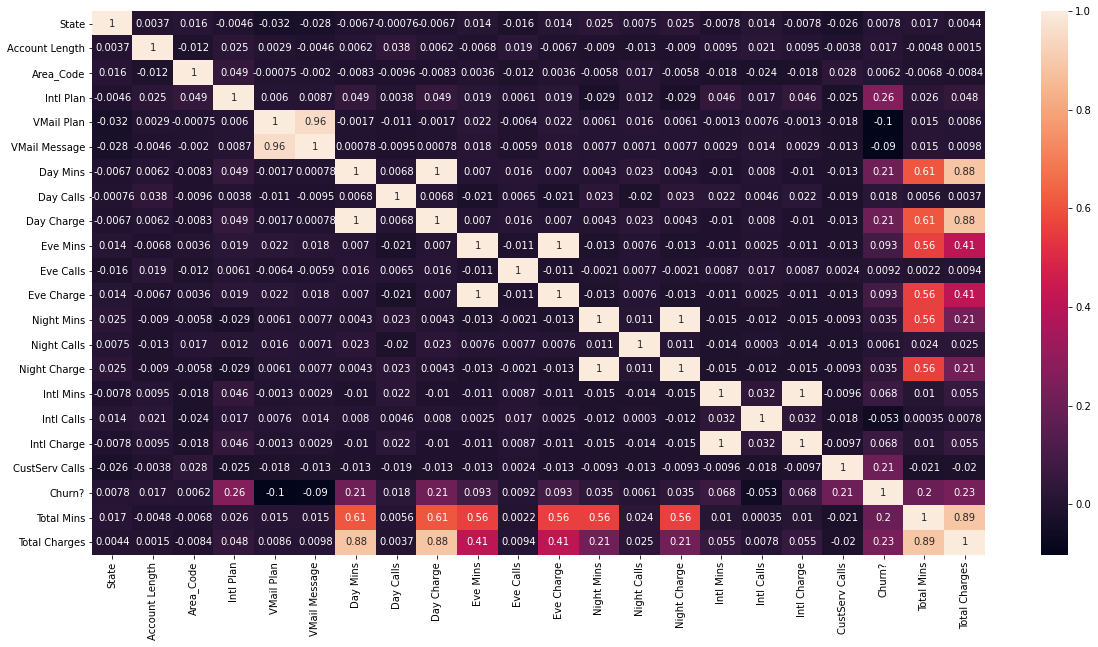

In [ ]:
#Check the correlations of data
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20 , 10))
sns.heatmap(data.corr() , annot = True, ax=ax)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 7)

In [ ]:
independent = data.columns
independent = independent.delete(3)
independent

Index(['State', 'Account Length', 'Area_Code', 'Intl Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?',
       'Total Mins', 'Total Charges'],
      dtype='object')

In [ ]:
# Train the model using data
model.fit(data[independent])

# Predict Clusters using the KMeans algorithm
data["Cluster Labels"] = model.predict(data[independent])
data.head(3)

,State,Account Length,Area_Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Charges,Cluster Labels
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,75.56,5
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,59.24,6
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,62.29,2


In [ ]:
data["Cluster Labels"].value_counts()

Text(0.5, 1.0, 'High and Low Spenders on Platform')

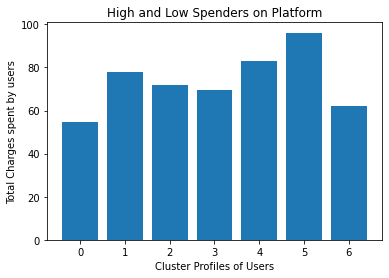

In [ ]:
# Interpretation and Evaluation
# Check the high spenders and low spenders from the data
plt.bar(data["Cluster Labels"], data["Total Charges"])
plt.xlabel("Cluster Profiles of Users")
plt.ylabel("Total Charges spent by users")
plt.title("High and Low Spenders on Platform")

In [ ]:
# Performing SQL Like operations on Dataframe
high_spenders = data[data["Cluster Labels"] == 3]
high_spenders_phone = high_spenders["Phone"]
high_spenders_phone

13      394-8006
17      386-2923
18      356-2992
24      343-4696
29      410-7789
          ...   
3296    380-3186
3302    358-9898
3304    330-7137
3316    390-6388
3331    364-6381
Name: Phone, Length: 449, dtype: object

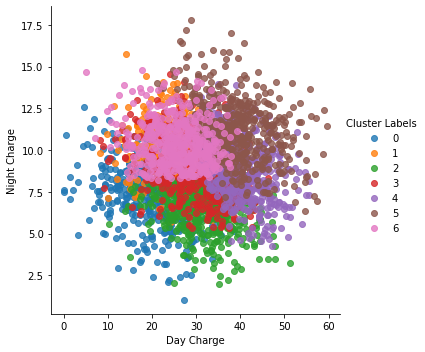

In [ ]:
# Show the overall distribution of telecom users in the dataset
sns.lmplot(x="Day Charge", y="Night Charge", data=data, hue="Cluster Labels", fit_reg=False)

In [ ]:
"""for phone in high_spenders_phone:
  sendSms(phone, "New Offer. Recharge with 300 to get 20% DISCOUNT")"""

'for phone in high_spenders_phone:\n  sendSms(phone, "New Offer. Recharge with 300 to get 20% DISCOUNT")'